In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv('fleet1.csv')
data.head(2)

,fleet operator,Segment,axle,load tonnage,parts repl last,last service kms,insurance renewal days,accident,puncture,Warranty,month days on road
0,A,transport,2,10.0,spark plug,125000,100,0,1,covered,10
1,B,construction,3,25.0,wheel alignment,100000,70,0,1,covered,20


In [3]:
data.shape

(320, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fleet operator          320 non-null    object 
 1   Segment                 320 non-null    object 
 2   axle                    320 non-null    int64  
 3   load tonnage            320 non-null    float64
 4   parts repl last         320 non-null    object 
 5   last service  kms       320 non-null    int64  
 6   insurance renewal days  320 non-null    int64  
 7   accident                320 non-null    int64  
 8   puncture                320 non-null    int64  
 9   Warranty                320 non-null    object 
 10  month days on road      320 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 27.6+ KB


In [5]:
data=data.rename(columns={'fleet operator':'fleet_operator','load tonnage':'load_tonnage','parts repl last':'parts_repl_last'})

In [6]:
data=data.rename(columns={'last service  kms':'last_service_kms','insurance renewal days':'insurance_renewal_days','month days on road':'month_days_on_road'})

In [7]:
data.columns

Index(['fleet_operator', 'Segment', 'axle', 'load_tonnage', 'parts_repl_last',
       'last_service_kms', 'insurance_renewal_days', 'accident', 'puncture',
       'Warranty', 'month_days_on_road'],
      dtype='object')

Text(0.5, 1.0, 'Amount of load(in tons)')

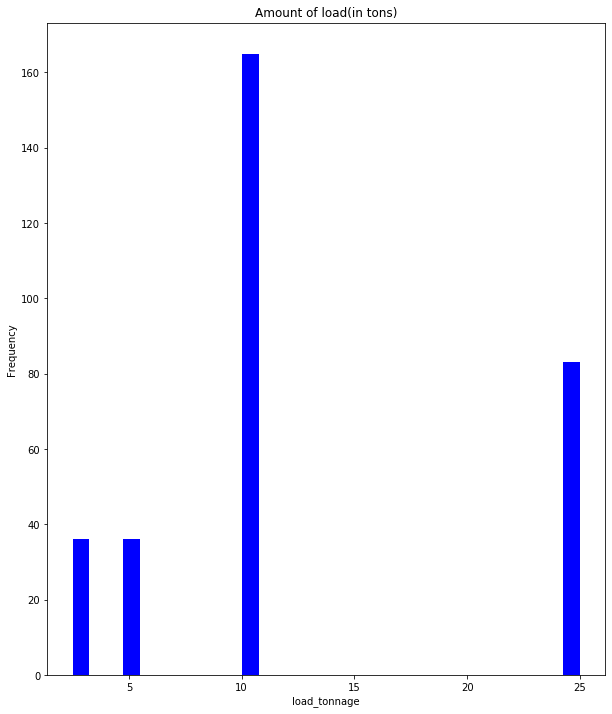

In [8]:
plt.figure(figsize=[10,12])
plt.hist(data['load_tonnage'],bins=30,color='b')
plt.xlabel('load_tonnage')
plt.ylabel('Frequency')
plt.title('Amount of load(in tons)')

Text(0.5, 1.0, 'Distance(in kms) after which service is done')

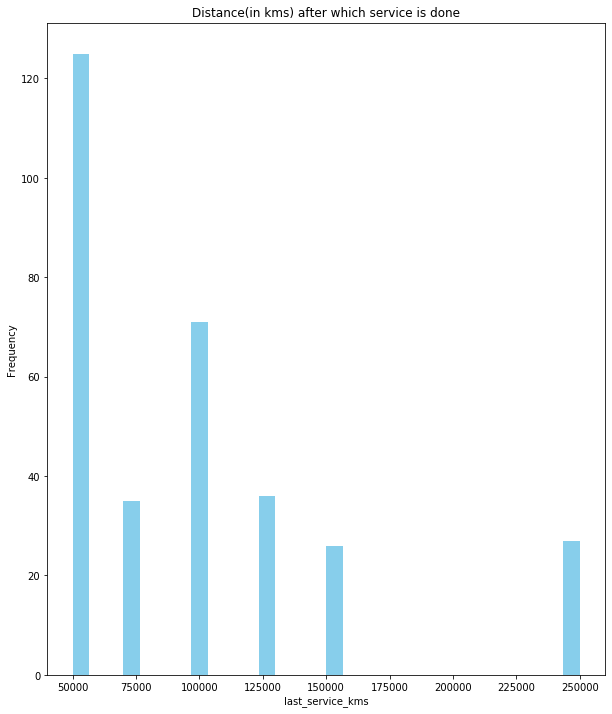

In [9]:
plt.figure(figsize=[10,12])
plt.hist(data['last_service_kms'],bins=30,color='skyblue')
plt.xlabel('last_service_kms')
plt.ylabel('Frequency')
plt.title('Distance(in kms) after which service is done')

Text(0.5, 1.0, 'Days after which insurance is done')

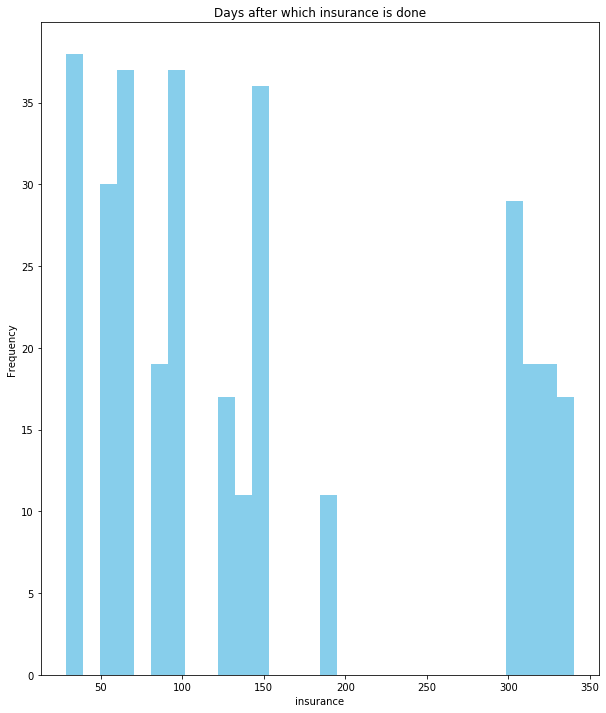

In [10]:
plt.figure(figsize=[10,12])
plt.hist(data['insurance_renewal_days'],bins=30,color='skyblue')
plt.xlabel('insurance')
plt.ylabel('Frequency')
plt.title('Days after which insurance is done')

Text(0.5, 1.0, 'Days it spends on road')

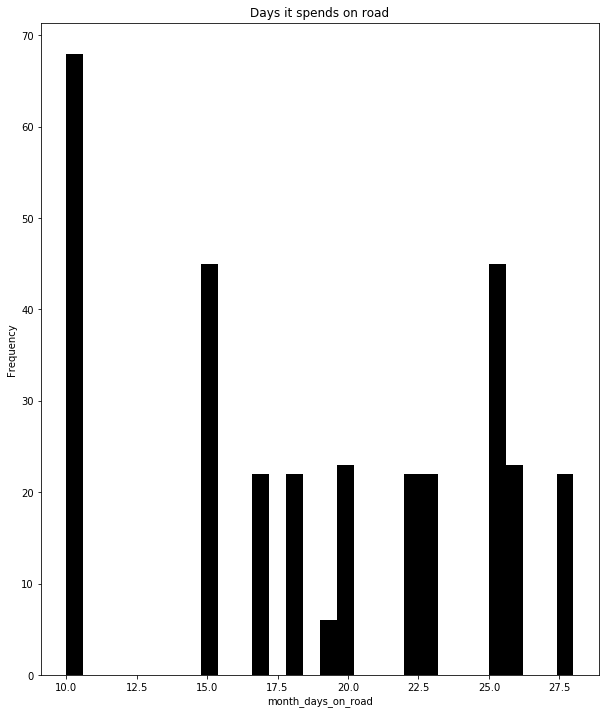

In [11]:
plt.figure(figsize=[10,12])
plt.hist(data['month_days_on_road'],bins=30,color='black')
plt.xlabel('month_days_on_road')
plt.ylabel('Frequency')
plt.title('Days it spends on road')

In [12]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

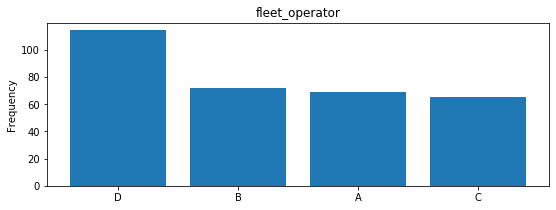

fleet_operator: 
 D    114
B     72
A     69
C     65
Name: fleet_operator, dtype: int64


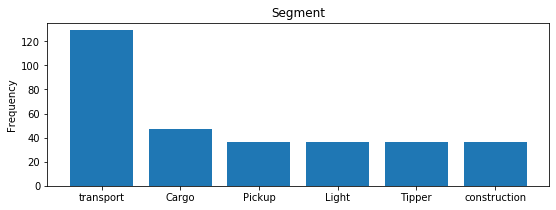

Segment: 
 transport       129
Cargo            47
Pickup           36
Light            36
Tipper           36
construction     36
Name: Segment, dtype: int64


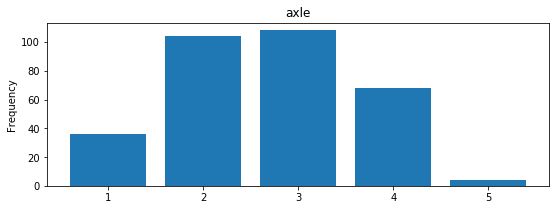

axle: 
 3    108
2    104
4     68
1     36
5      4
Name: axle, dtype: int64


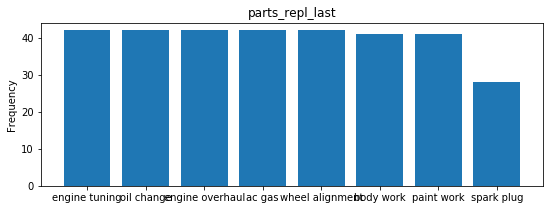

parts_repl_last: 
 engine tuning      42
oil change         42
engine overhaul    42
ac gas             42
wheel alignment    42
body work          41
paint work         41
spark plug         28
Name: parts_repl_last, dtype: int64


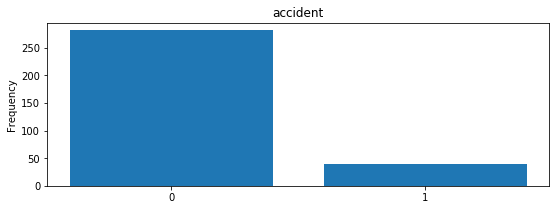

accident: 
 0    281
1     39
Name: accident, dtype: int64


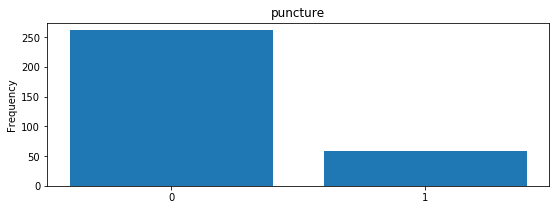

puncture: 
 0    261
1     59
Name: puncture, dtype: int64


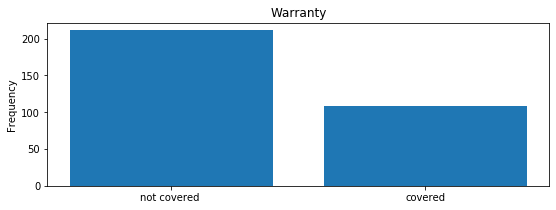

Warranty: 
 not covered     211
covered         109
Name: Warranty, dtype: int64


In [13]:
category1 = ["fleet_operator","Segment","axle","parts_repl_last","accident","puncture","Warranty"]
for c in category1:
    bar_plot(c)

In [14]:
data.isnull().sum()

fleet_operator            0
Segment                   0
axle                      0
load_tonnage              0
parts_repl_last           0
last_service_kms          0
insurance_renewal_days    0
accident                  0
puncture                  0
Warranty                  0
month_days_on_road        0
dtype: int64

In [15]:
data=data.rename(columns={'accident':'target'})

In [16]:
# Split the data into positive and negative
positive_rows = data.target == 1.0
data_pos = data.loc[positive_rows]
data_neg = data.loc[~positive_rows]

# Merge the balanced data
data = pd.concat([data_pos, data_neg.sample(n = len(data_pos))], axis = 0)

# Shuffle the order of data
data = data.sample(n = len(data)).reset_index(drop = True)

In [17]:
data['target'] = data['target'].astype(int)

In [18]:
def label_encoding(categories):
    """
    To perform mapping of categorical features
    """
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping

In [19]:
data['fleet_operator'] = data['fleet_operator'].map(label_encoding(data['fleet_operator']))
data['Segment'] = data['Segment'].map(label_encoding(data['Segment']))
data['parts_repl_last'] = data['parts_repl_last'].map(label_encoding(data['parts_repl_last']))
data['Warranty'] = data['Warranty'].map(label_encoding(data['Warranty']))
data.head()

,fleet_operator,Segment,axle,load_tonnage,parts_repl_last,last_service_kms,insurance_renewal_days,target,puncture,Warranty,month_days_on_road
0,3,3,1,2.5,0,50000,310,1,0,1,23
1,1,5,4,10.0,4,50000,100,0,0,1,26
2,1,5,3,10.0,5,250000,70,0,0,1,28
3,2,1,2,10.0,1,125000,50,1,0,1,15
4,3,5,4,10.0,4,50000,190,0,0,1,10


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
def get_accuracy(y_true, y_preds):
    # Getting score of confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    # Calculating accuracy
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

In [66]:
X = data[['Segment', 'axle', 'load_tonnage', 'parts_repl_last', 'last_service_kms']].values
y = data[['target']].values

In [67]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.23, random_state=201)

# Splitting Train-set and Validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=50)

In [68]:
catboost = CatBoostClassifier(random_state=0)
catboost.fit(X_train, y_train, verbose=False)

In [69]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
models = [lr, catboost, gnb, rf, knn, xgb]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)

In [75]:
model_name = ['Logistic Regression', 'Catboost', 'Naive Bayes', 'Random Forest', 'KNN', 'XGBoost']
accuracy = dict(zip(model_name, acc))

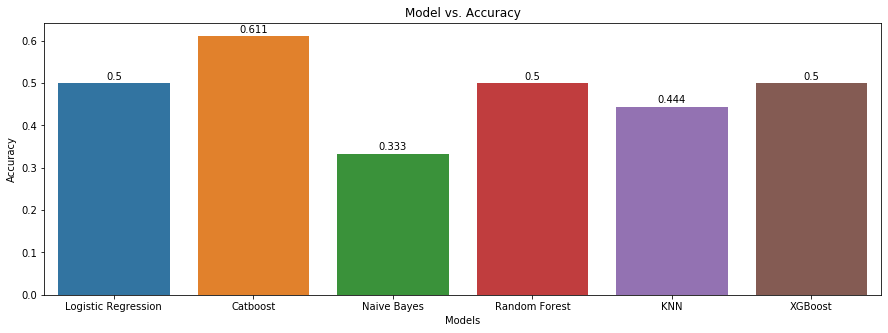

In [76]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = list(accuracy.keys()), y = list(accuracy.values()))
for p, value in zip(ax.patches, list(accuracy.values())):
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, round(value, 3), ha="center") 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs. Accuracy")
plt.show()

######  using hyperparameter to try to improve classification result

######  for randomforest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

In [35]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_val)

In [36]:
from sklearn.model_selection import validation_curve

In [37]:
forestVC = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_val)

In [38]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 16.2min finished


In [52]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
                                   
modelOpt = forestOpt.fit(X_train, y_train)
y_pred1 = modelOpt.predict(X_val)

In [44]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [46]:
y_val

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

#### for k neighbors

In [47]:
leaf_size = list(range(1,5))
n_neighbors = list(range(1,3))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=2)

best_model = clf.fit(X_train,y_train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [48]:
knn_best = KNeighborsClassifier(leaf_size=3, p=1, n_neighbors=1)
knn_best.fit(X_train, y_train)
test_preds_1 = knn_best.predict(X_test)

In [54]:
get_accuracy(y_test, test_preds_1)

0.3888888888888889

In [82]:
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,60]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_val)*100))

Train Accuracy:   97.6%
CV Mean Accuracy: 45.3%
Test Accuracy:    55.6%
